<a href="https://colab.research.google.com/github/DarcyMae/Telehealth_Trends_Project/blob/main/Telemedicine_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from google.colab import files
uploaded = files.upload()

Saving Telemedicine_Use_in_the_Last_4_Weeks_20240409.csv to Telemedicine_Use_in_the_Last_4_Weeks_20240409 (1).csv


In [73]:
import pandas as pd
import numpy as np
import io

print(uploaded)


{'Telemedicine_Use_in_the_Last_4_Weeks_20240409 (1).csv': b'Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,,\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,,\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,,\n"Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks",By Age,United States,40 - 49 years,3.1

In [74]:
df_Telemedicine = pd.read_csv(io.BytesIO(uploaded['Telemedicine_Use_in_the_Last_4_Weeks_20240409 (1).csv']))

In [75]:
#Print DataFrame
df_Telemedicine.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag
0,Adults Who Had Appointment with Health Profess...,National Estimate,United States,United States,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN
1,Adults Who Had Appointment with Health Profess...,By Age,United States,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN
2,Adults Who Had Appointment with Health Profess...,By Age,United States,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN
3,Adults Who Had Appointment with Health Profess...,By Age,United States,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN
4,Adults Who Had Appointment with Health Profess...,By Age,United States,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",04/14/2021,04/26/2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN


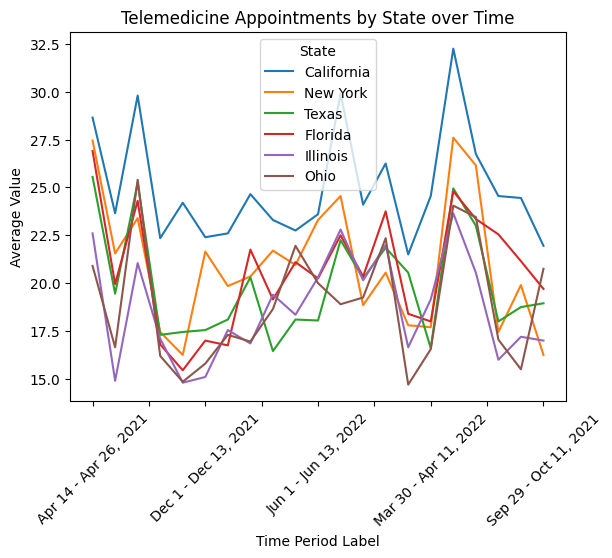

In [96]:
import matplotlib.pyplot as plt

# Assuming df_Telemedicine is your DataFrame and it has already been loaded with the necessary data
# Pivot the table with specified filtering for states
pivot_table = df_Telemedicine.pivot_table(values='Value', index='Time Period Label', columns='State')

# Select only the six states of interest
states_of_interest = ['California', 'New York', 'Texas', 'Florida', 'Illinois', 'Ohio']
filtered_table = pivot_table[states_of_interest]

# Plotting the data
filtered_table.plot(kind='line')
plt.title('Telemedicine Appointments by State over Time')
plt.ylabel('Average Value')
plt.xlabel('Time Period Label')
plt.xticks(rotation=45)

# Display the plot
plt.show()


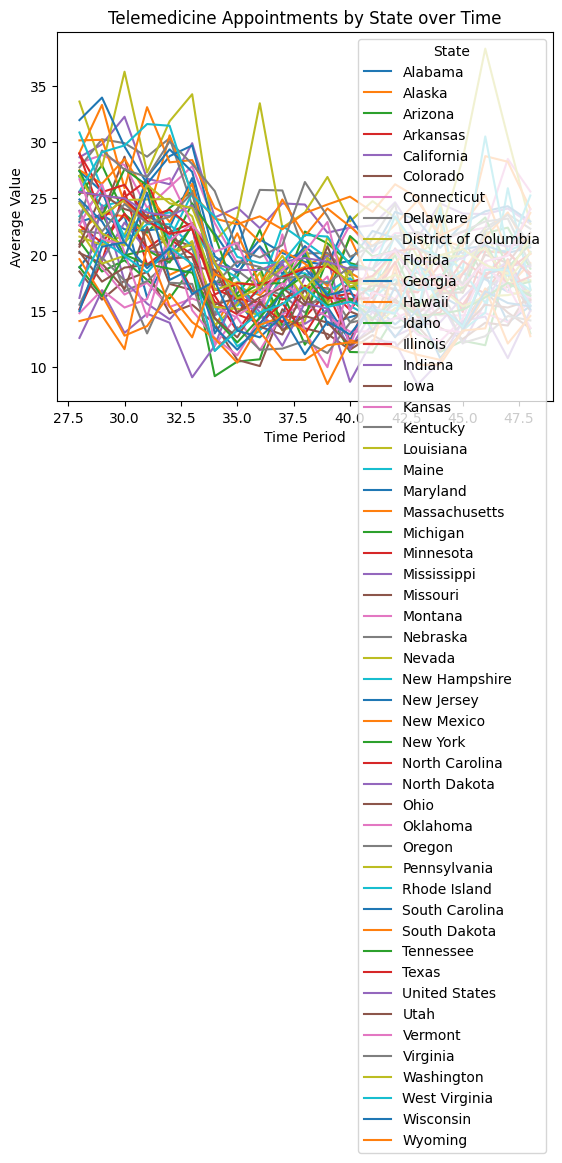

In [93]:
# @title Telemedicine Appointments by State over Time

import matplotlib.pyplot as plt
df_Telemedicine.pivot_table(values='Value', index='Time Period', columns='State').plot(kind='line')
plt.title('Telemedicine Appointments by State over Time')
plt.ylabel('Average Value')
_ = plt.xlabel('Time Period')

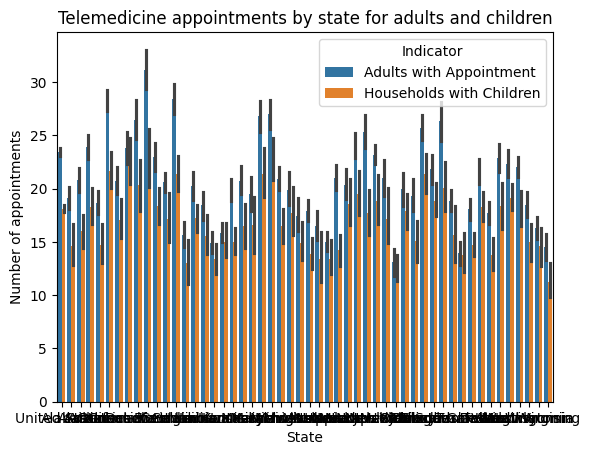

In [92]:
# @title Telemedicine appointments by state for adults and children

import matplotlib.pyplot as plt
sns.barplot(data=df_Telemedicine, x="State", y="Value", hue="Indicator")
plt.title("Telemedicine appointments by state for adults and children")
plt.xlabel("State")
_ = plt.ylabel("Number of appointments")

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52]),
 [Text(1, 0, 'Alabama'),
  Text(2, 0, 'Alaska'),
  Text(3, 0, 'Arizona'),
  Text(4, 0, 'Arkansas'),
  Text(5, 0, 'California'),
  Text(6, 0, 'Colorado'),
  Text(7, 0, 'Connecticut'),
  Text(8, 0, 'Delaware'),
  Text(9, 0, 'District of Columbia'),
  Text(10, 0, 'Florida'),
  Text(11, 0, 'Georgia'),
  Text(12, 0, 'Hawaii'),
  Text(13, 0, 'Idaho'),
  Text(14, 0, 'Illinois'),
  Text(15, 0, 'Indiana'),
  Text(16, 0, 'Iowa'),
  Text(17, 0, 'Kansas'),
  Text(18, 0, 'Kentucky'),
  Text(19, 0, 'Louisiana'),
  Text(20, 0, 'Maine'),
  Text(21, 0, 'Maryland'),
  Text(22, 0, 'Massachusetts'),
  Text(23, 0, 'Michigan'),
  Text(24, 0, 'Minnesota'),
  Text(25, 0, 'Mississippi'),
  Text(26, 0, 'Missouri'),
  Text(27, 0, 'Montana'),
  Text(28, 0, 'Nebraska'),
  Text

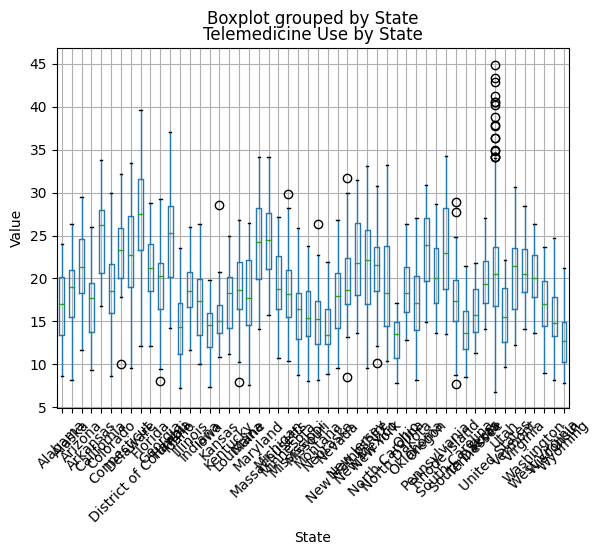

In [91]:
# @title Telemedicine Use by State

import matplotlib.pyplot as plt
df_Telemedicine.boxplot(column='Value', by='State')
plt.title('Telemedicine Use by State')
plt.ylabel('Value')
_ = plt.xlabel('State')
plt.xticks(rotation=45)

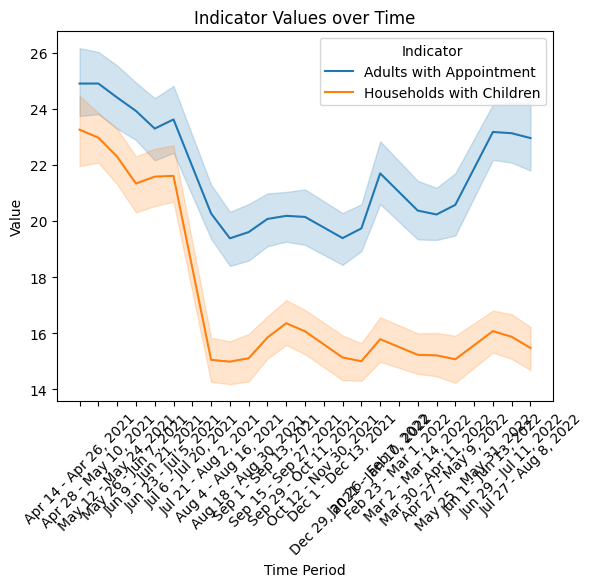

In [89]:
# @title Indicator Values over Time

import matplotlib.pyplot as plt
sns.lineplot(data=df_Telemedicine, x="Time Period Label", y="Value", hue="Indicator")
plt.title("Indicator Values over Time")
plt.xlabel("Time Period")
plt.xticks(rotation=45)
_ = plt.ylabel("Value")

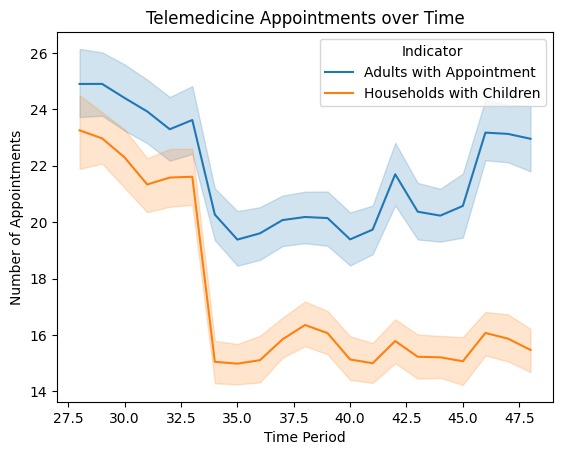

In [87]:
# @title Telemedicine Appointments over Time

import matplotlib.pyplot as plt
sns.lineplot(data=df_Telemedicine, x="Time Period", y="Value", hue="Indicator")
plt.title("Telemedicine Appointments over Time")
plt.xlabel("Time Period")
_ = plt.ylabel("Number of Appointments")

<Axes: xlabel='State'>

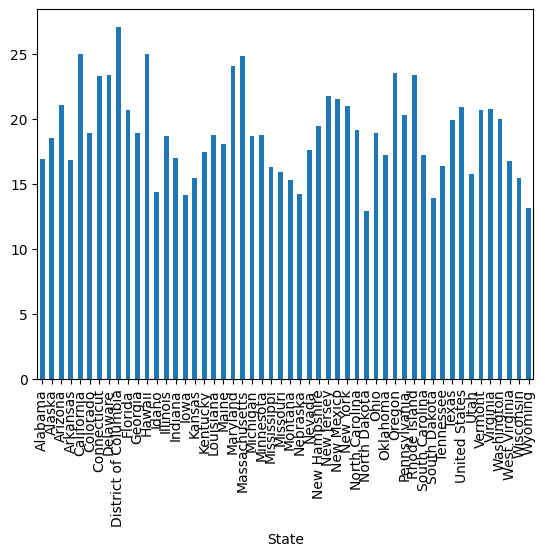

In [86]:
# @title Average Value of Indicator by State

df_Telemedicine.groupby('State')['Value'].mean().plot(kind='bar')

<Axes: xlabel='Time Period', ylabel='Value'>

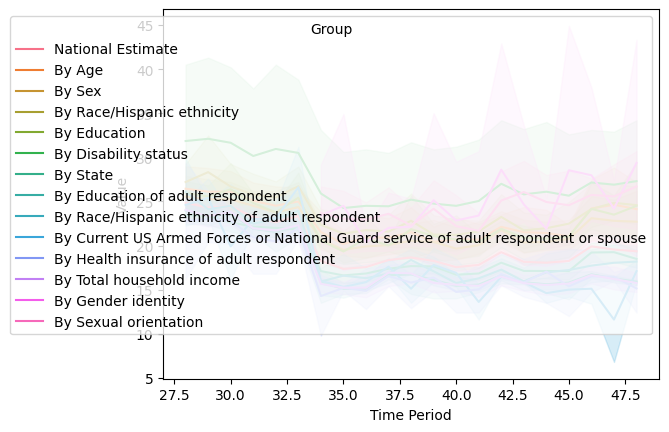

In [85]:
# @title Average Y by Group over time

sns.lineplot(data=df_Telemedicine, x="Time Period", y="Value", hue="Group")

<Axes: xlabel='Value', ylabel='Count'>

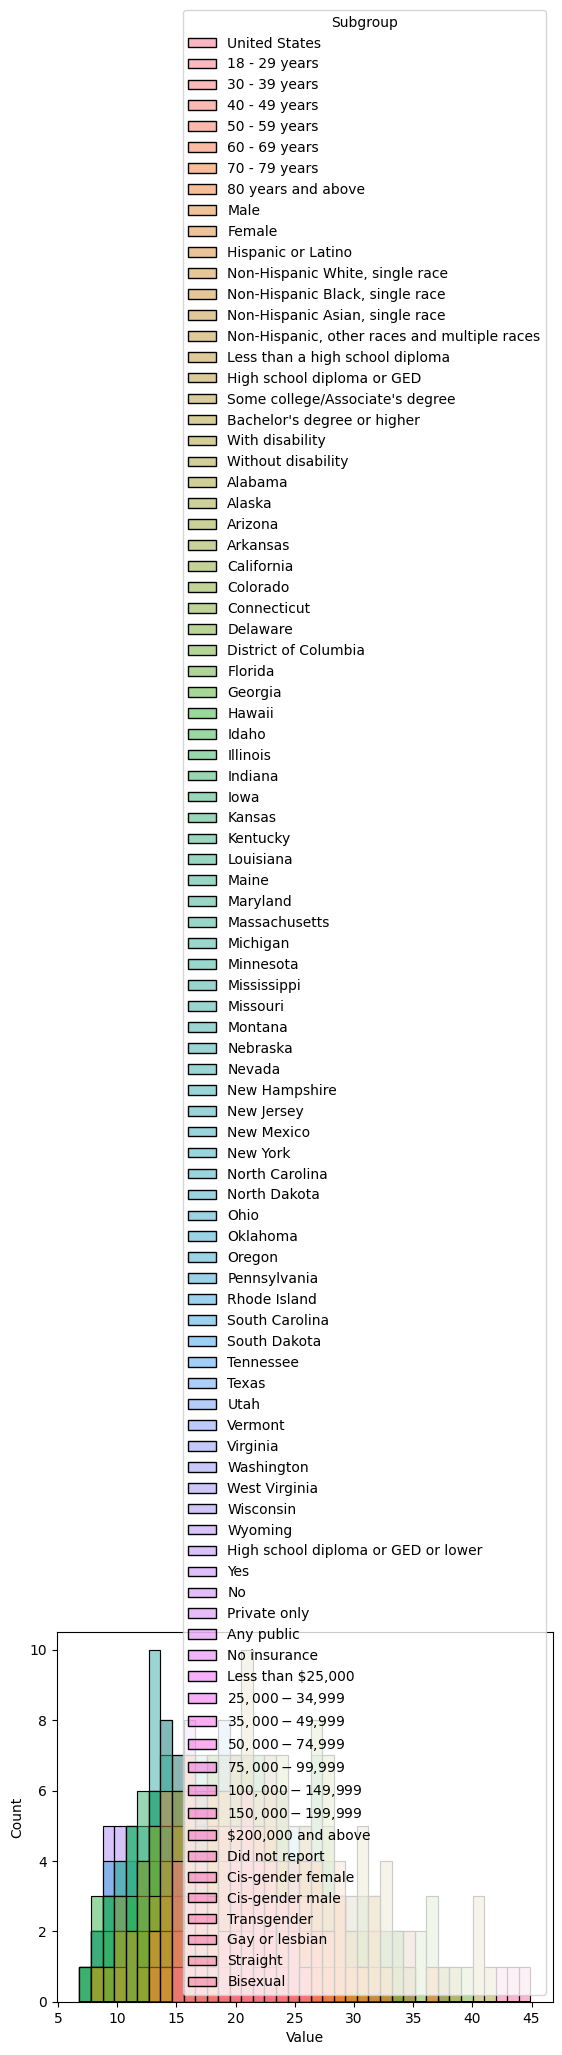

In [84]:
# @title Distribution of Telemedicine Use by Subgroup

sns.histplot(data=df_Telemedicine, x='Value', hue='Subgroup')

In [77]:
df_Telemedicine['Indicator'].unique()

array(['Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks',
       'Households With Children Where Any Child Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks'],
      dtype=object)

In [80]:
df_Telemedicine['Indicator'].unique()
df_Telemedicine.loc[df_Telemedicine['Indicator'] == 'Adults Who Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks', 'Indicator'] = 'Adults with Appointment'
df_Telemedicine.loc[df_Telemedicine['Indicator'] == 'Households With Children Where Any Child Had Appointment with Health Professional Over Video or Phone, Last 4 Weeks', 'Indicator'] = 'Households with Children'


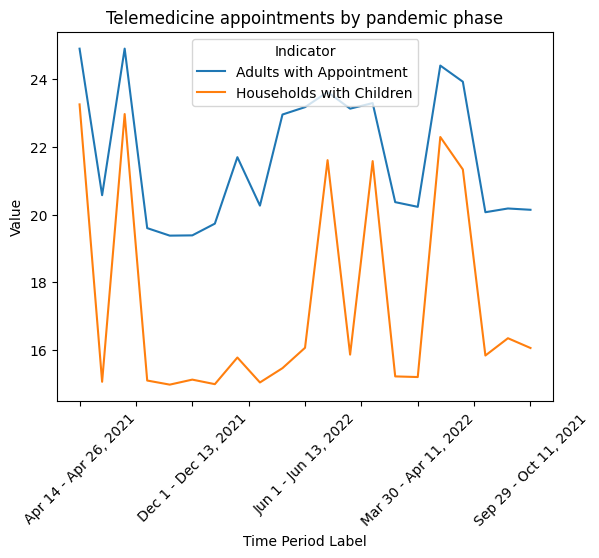

In [83]:
# @title Telemedicine appointments by pandemic phase

import matplotlib.pyplot as plt
df_Telemedicine.pivot_table(index='Time Period Label', columns='Indicator', values='Value').plot(kind='line', title='Telemedicine appointments by pandemic phase')
plt.xticks(rotation=45)
_ = plt.ylabel('Value')


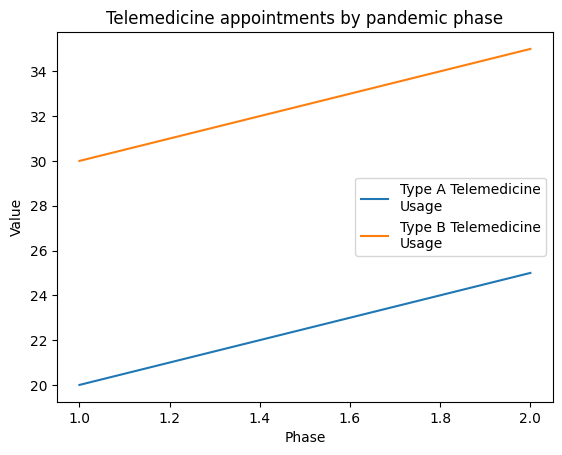

In [68]:
import matplotlib.pyplot as plt
import pandas as pd
import textwrap

# Example data setup (replace this with your actual DataFrame loading)
data = {
    'Phase': [1, 1, 2, 2],
    'Indicator': ['Type A Telemedicine Usage', 'Type B Telemedicine Usage', 'Type A Telemedicine Usage', 'Type B Telemedicine Usage'],
    'Value': [20, 30, 25, 35]
}
df_Telemedicine = pd.DataFrame(data).pivot_table(index='Phase', columns='Indicator', values='Value')

# Plotting the data
ax = df_Telemedicine.plot(kind='line', title='Telemedicine appointments by pandemic phase')
_ = plt.ylabel('Value')

# Wrapping text in the legend
wrapped_labels = [textwrap.fill(label, width=20) for label in df_Telemedicine.columns]
ax.legend(wrapped_labels)

plt.show()


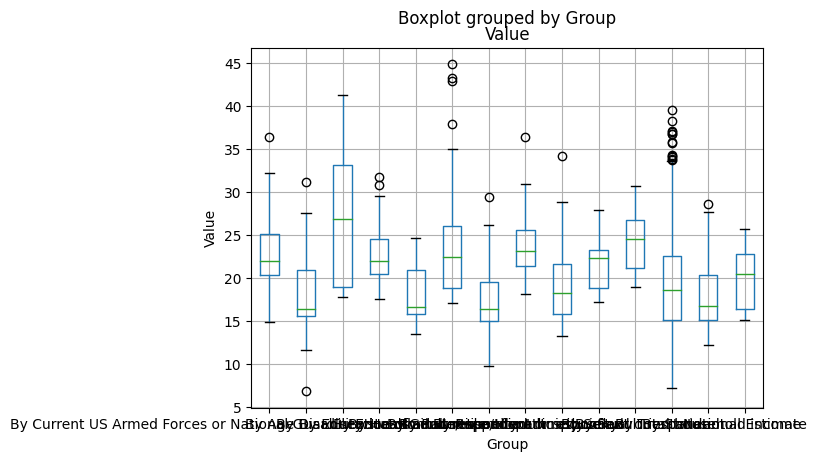

In [60]:
# @title Value by Group

import matplotlib.pyplot as plt
df_Telemedicine.boxplot(column='Value', by='Group')
plt.xlabel('Group')
_ = plt.ylabel('Value')

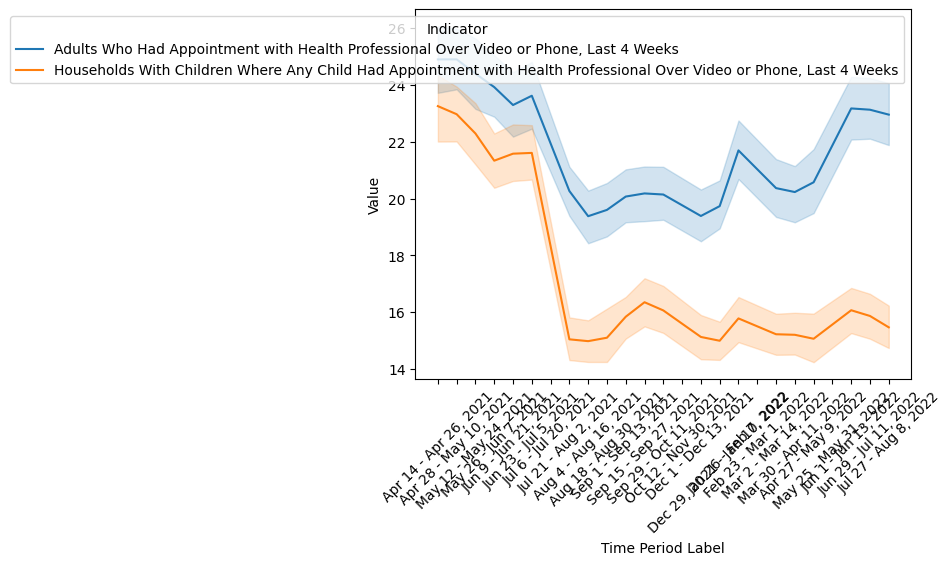

In [59]:
# @title Value by Indicator over Time

import matplotlib.pyplot as plt
sns.lineplot(data=df_Telemedicine, x="Time Period Label", y="Value", hue="Indicator")
_ = plt.xticks(rotation=45)

<ipython-input-58-77f36c1c7483>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_Telemedicine, x='Value', y='Indicator', inner='box', palette='Dark2')


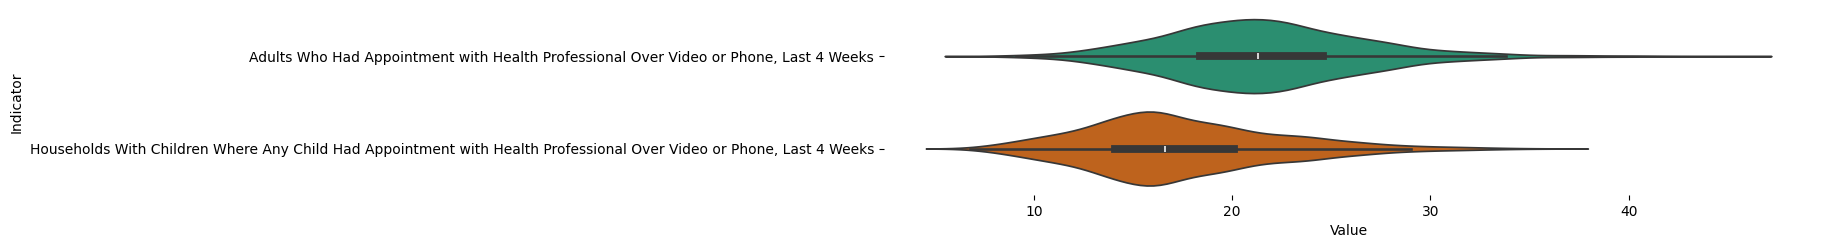

In [58]:
# @title Indicator vs Value

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_Telemedicine['Indicator'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_Telemedicine, x='Value', y='Indicator', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

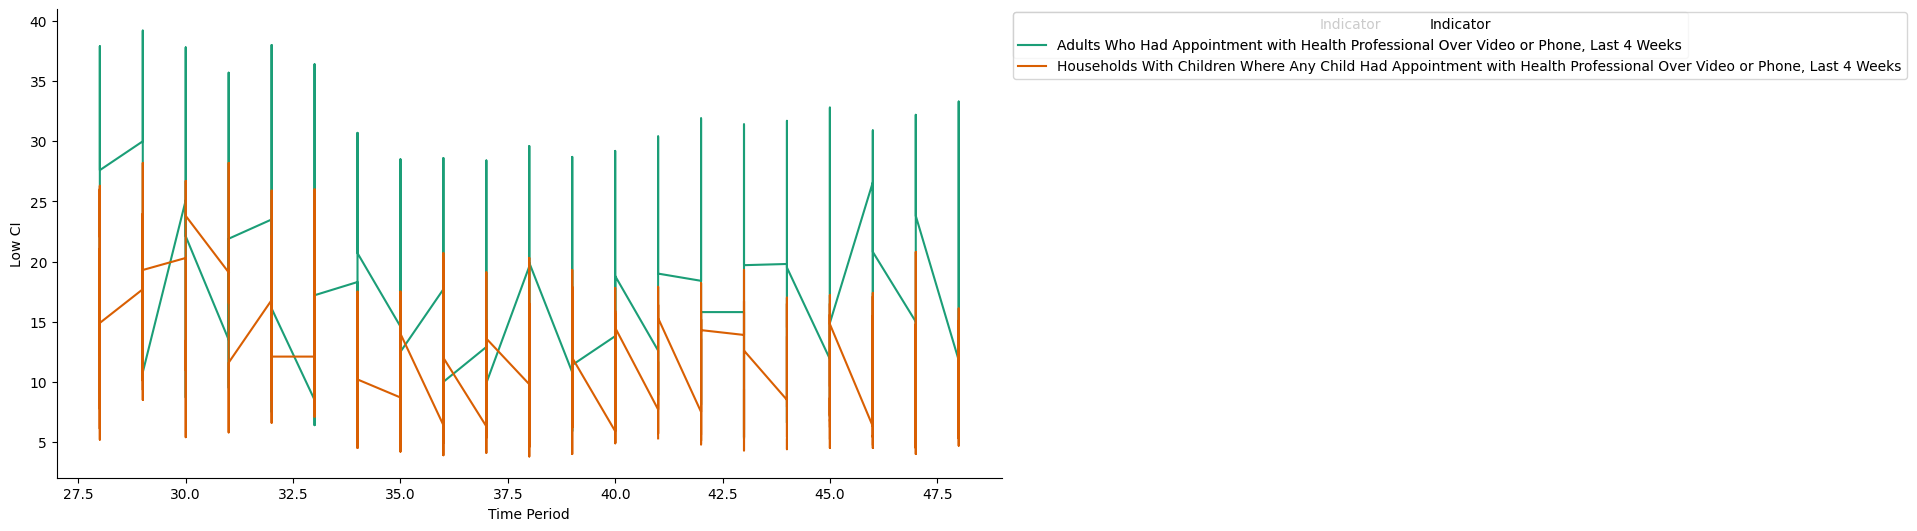

In [57]:
# @title Time Period vs Low CI

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time Period']
  ys = series['Low CI']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_Telemedicine.sort_values('Time Period', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Indicator')):
  _plot_series(series, series_name, i)
  fig.legend(title='Indicator', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time Period')
_ = plt.ylabel('Low CI')

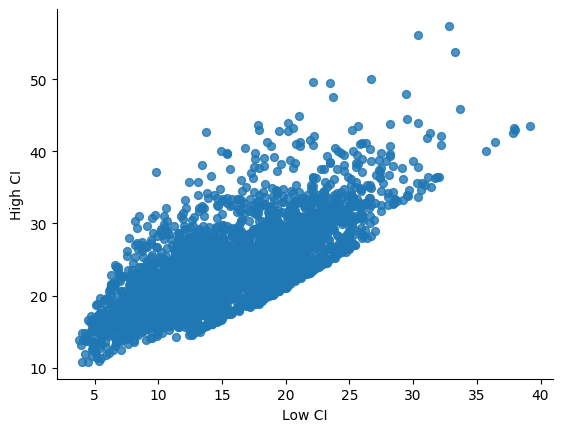

In [56]:
# @title Low CI vs High CI

from matplotlib import pyplot as plt
df_Telemedicine.plot(kind='scatter', x='Low CI', y='High CI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
#Convert Date Columns to datetime
df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
    df_Telemedicine["Time Period Start Date"],
    infer_datetime_format =True,
    utc = True
)
df_Telemedicine["Time Period End Date"] = pd.to_datetime(
    df_Telemedicine["Time Period End Date"],
    infer_datetime_format =True,
    utc = True
)

<ipython-input-10-8e04e892e953>:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period Start Date"] = pd.to_datetime(
<ipython-input-10-8e04e892e953>:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_Telemedicine["Time Period End Date"] = pd.to_datetime(


In [11]:
#Convert Dates to quarters
df_Telemedicine['quarters end period'] = df_Telemedicine["Time Period End Date"].dt.quarter
df_Telemedicine['quarters star period'] = df_Telemedicine["Time Period Start Date"].dt.quarter
Start_End_equal = df_Telemedicine['quarters end period']==df_Telemedicine['quarters star period']
any_false=(~Start_End_equal).any()
print(any_false)

True


In [12]:

df_Telemedicine_quarters = df_Telemedicine.drop('quarters end period', axis=1).rename(columns={'quarters star period': 'Quarter'}).drop('Time Period End Date', axis=1)
df_Telemedicine_quarters['Time Period Start Date'] = df_Telemedicine_quarters["Time Period Start Date"].dt.year
df_tele_qtr_yr = df_Telemedicine_quarters.rename(columns={'Time Period Start Date': 'Year'})

In [13]:
df_tele_qtr_yr['State'].unique()
df_tele_qtr_yr.loc[df_tele_qtr_yr['State'] == 'United States', 'State'] = 'National'

In [14]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3


<Axes: title={'center': 'Average Indicator Value by Group over Time'}, xlabel='Indicator,Group'>

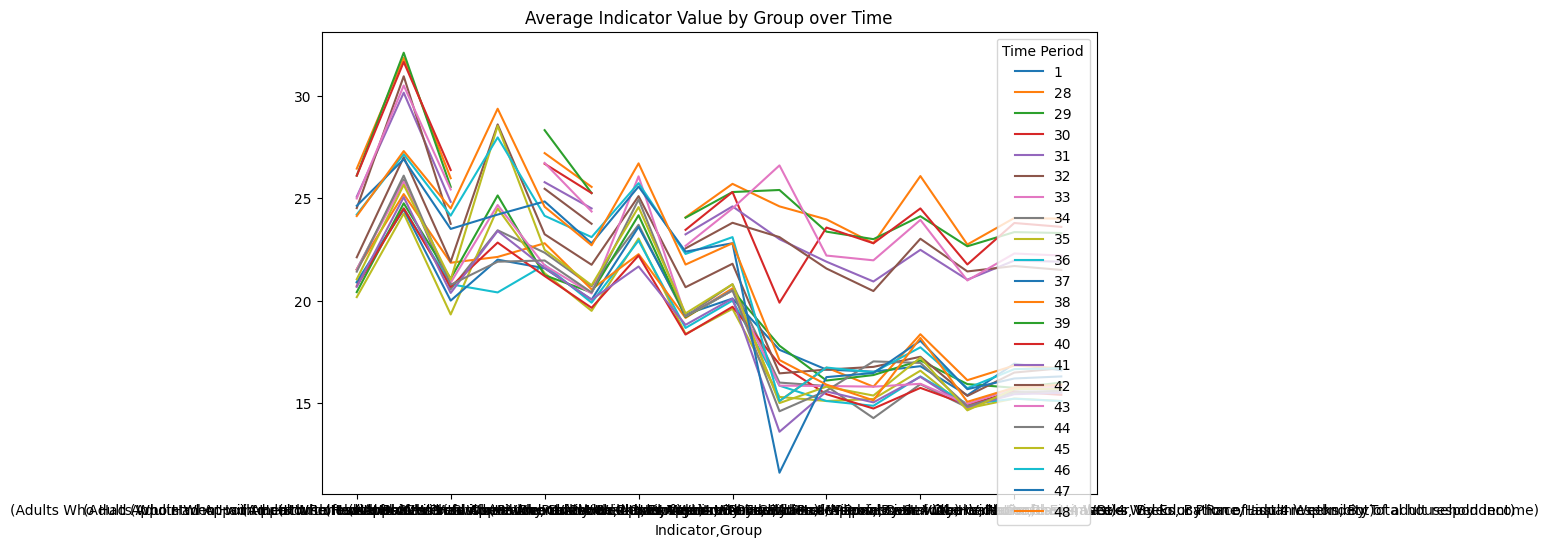

In [27]:
# @title Average Indicator Value by Group over Time

df_tele_qtr_yr.groupby(['Indicator', 'Group', 'Time Period'])['Value'].mean().unstack().plot(title='Average Indicator Value by Group over Time', figsize=(10, 6))

In [15]:
df_tele_qtr_yr['Time Period Label'].unique()

array(['Apr 14 - Apr 26, 2021', 'Apr 28 - May 10, 2021',
       'May 12 - May 24, 2021', 'May 26 - Jun 7, 2021',
       'Jun 9 - Jun 21, 2021', 'Jun 23 - Jul 5, 2021',
       'Jul 6 - Jul 20, 2021', 'Jul 21 - Aug 2, 2021',
       'Aug 4 - Aug 16, 2021', 'Aug 18 - Aug 30, 2021',
       'Sep 1 - Sep 13, 2021', 'Sep 15 - Sep 27, 2021',
       'Sep 29 - Oct 11, 2021', 'Oct 12 - Nov 30, 2021',
       'Dec 1 - Dec 13, 2021', 'Dec 29, 2021 - Jan 10, 2022',
       'Jan 26 - Feb 7, 2022', 'Feb 23 - Mar 1, 2022',
       'Mar 2 - Mar 14, 2022', 'Mar 30 - Apr 11, 2022',
       'Apr 27 - May 9, 2022', 'May 25 - May 31, 2022',
       'Jun 1 - Jun 13, 2022', 'Jun 29 - Jul 11, 2022',
       'Jul 27 - Aug 8, 2022'], dtype=object)

In [16]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3


In [36]:
import pandas as pd

# Define a dictionary to map values
mapping_dict = {
    'Apr 14 - Apr 26, 2021': 17070,
    'Apr 28 - May 10, 2021': 20047,
    'May 12 - May 24, 2021': 18658,
    'May 26 - Jun 7, 2021': 17632,
    'Jun 9 - Jun 21, 2021': 17053,
    'Jun 23 - Jul 5, 2021': 16639,
    'Jul 21 - Aug 2, 2021': 17373,
    'Aug 4 - Aug 16, 2021': 18655,
    'Aug 18 - Aug 30, 2021': 18608,
    'Sep 1 - Sep 13, 2021': 16967,
    'Sep 15 - Sep 27, 2021': 15724,
    'Sep 29 - Oct 11, 2021': 14738,
    'Dec 1 - Dec 13, 2021': 15687,
    'Dec 29, 2021 - Jan 10, 2022': 21371,
    'Jan 26 - Feb 7, 2022': 20542,
    'Mar 2 - Mar 14, 2022': 21707,
    'Mar 30 - Apr 11, 2022': 15943,
    'Apr 27 - May 9, 2022': 15156 ,
    'Jun 1 - Jun 13, 2022': 15766,
    'Jun 29 - Jul 11, 2022': 14598,
    'Jul 27 - Aug 8, 2022': 1300

}

# Define a function to map values based on the dictionary
def map_values(label):
    return mapping_dict.get(label, None)

# Apply the function to create a new column
df_tele_qtr_yr['Sample Size Households with Children'] = df_tele_qtr_yr['Time Period Label'].apply(map_values)

df_tele_qtr_yr.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter,Sample Size Households with Children
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,17070.0
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,17070.0
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,17070.0
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,17070.0
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,17070.0


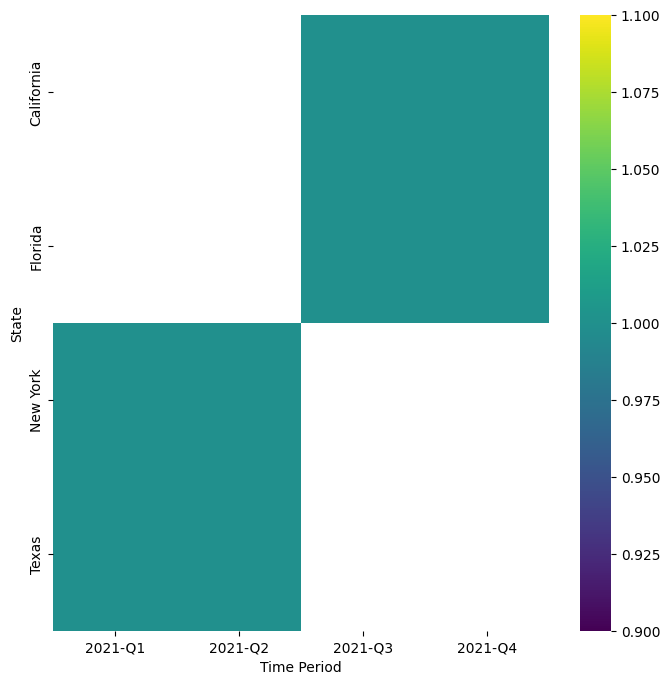

In [29]:
# @title Time Period vs State

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['State'].value_counts()
    for x_label, grp in df_Telemedicine.groupby('Time Period')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Time Period')
_ = plt.ylabel('State')

In [37]:
import pandas as pd

# Define a dictionary to map values
mapping_dict = {
    'Apr 14 - Apr 26, 2021': 54835,
    'Apr 28 - May 10, 2021': 62895,
    'May 12 - May 24, 2021': 58286,
    'May 26 - Jun 7, 2021': 56436,
    'Jun 9 - Jun 21, 2021': 54267,
    'Jun 23 - Jul 5, 2021': 52838,
    'Jul 21 - Aug 2, 2021': 55699,
    'Aug 4 - Aug 16, 2021': 59362,
    'Aug 18 - Aug 30, 2021': 59705,
    'Sep 1 - Sep 13, 2021': 54950,
    'Sep 15 - Sep 27, 2021': 51652,
    'Sep 29 - Oct 11, 2021': 49230,
    'Dec 1 - Dec 13, 2021': 53078,
    'Dec 29, 2021 - Jan 10, 2022': 67259,
    'Jan 26 - Feb 7, 2022': 66542,
    'Mar 2 - Mar 14, 2022': 71848,
    'Mar 30 - Apr 11, 2022': 54830,
    'Apr 27 - May 9, 2022': 52925 ,
    'Jun 1 - Jun 13, 2022': 53794,
    'Jun 29 - Jul 11, 2022': 49637,
    'Jul 27 - Aug 8, 2022': 40180

}

# Define a function to map values based on the dictionary
def map_values(label):
    return mapping_dict.get(label, None)

# Apply the function to create a new column
df_tele_qtr_yr['Sample Size Adult'] = df_tele_qtr_yr['Time Period Label'].apply(map_values)

df_tele_qtr_yr.head()


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter,Sample Size Households with Children,Sample Size Adult
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2,17070.0,54835.0
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2,17070.0,54835.0
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2,17070.0,54835.0
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2,17070.0,54835.0
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2,17070.0,54835.0


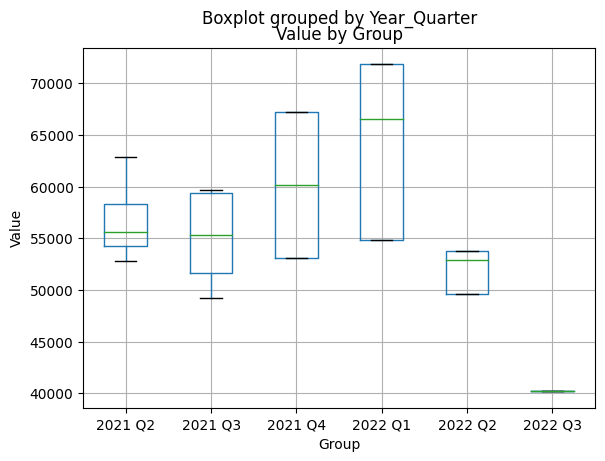

In [46]:
# @title Value by Group

import matplotlib.pyplot as plt
df_tele_qtr_yr.boxplot(column='Sample Size Adult', by='Year_Quarter')
plt.xlabel('Group')
plt.ylabel('Value')
_ = plt.title('Value by Group')

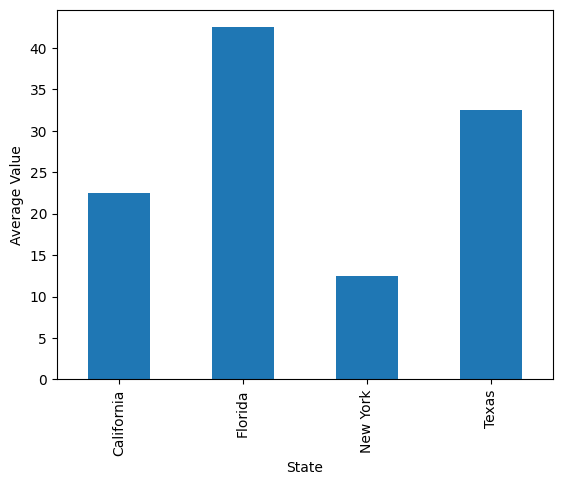

In [32]:
# @title Average Value by State

import matplotlib.pyplot as plt
df_Telemedicine.groupby('State')['Value'].mean().plot(kind='bar')
plt.xlabel('State')
_ = plt.ylabel('Average Value')

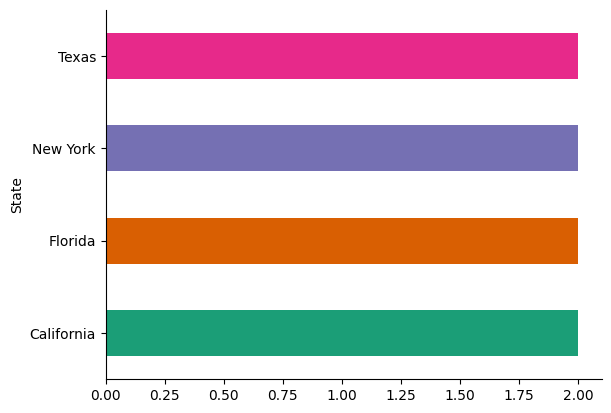

In [28]:
# @title State

from matplotlib import pyplot as plt
import seaborn as sns
df_Telemedicine.groupby('State').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

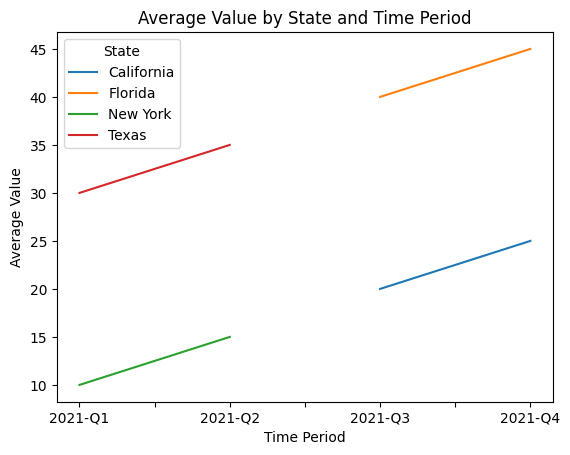

In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt

# # Example data setup for df_Telemedicine
# data = {
#     'Time Period': ['2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4', '2021-Q1', '2021-Q2', '2021-Q3', '2021-Q4'],
#     'State': ['New York', 'New York', 'California', 'California', 'Texas', 'Texas', 'Florida', 'Florida'],
#     'Value': [10, 15, 20, 25, 30, 35, 40, 45]
# }
# df_Telemedicine = pd.DataFrame(data)

# # Define the states of interest
# states_of_interest = ['New York', 'Illinois', 'California', 'Texas', 'Florida', 'Ohio']

# # Filter the DataFrame to include only the states of interest
# filtered_df = df_Telemedicine[df_Telemedicine['State'].isin(states_of_interest)]

# # Group by 'Time Period' and 'State', calculate the mean of 'Value', and plot
# filtered_df.groupby(['Time Period', 'State'])['Value'].mean().unstack().plot(kind='line')

# plt.title('Average Value by State and Time Period')
# plt.ylabel('Average Value')
# plt.xlabel('Time Period')
# plt.legend(title='State')
# plt.show()


In [ ]:
df_tele_qtr_yr['Group'].unique()

KeyError: 'Group'

In [ ]:
df_tele_qtr_yr_age = df_tele_qtr_yr[df_tele_qtr_yr['Group'] == 'By Age']

In [ ]:
df_tele_qtr_yr['State'].unique()

array(['National', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
df_tele_qtr_yr

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
0,Adults Who Had Appointment with Health Profess...,National Estimate,National,United States,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,25.0,26.4,25.0 - 26.4,NaN,NaN,2
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339,Households With Children Where Any Child Had A...,By State,Virginia,Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.8,12.9,26.1,12.9 - 26.1,18.2-23.1,NaN,3
3340,Households With Children Where Any Child Had A...,By State,Washington,Washington,3.5,48,"Jul 27 - Aug 8, 2022",2022,18.9,15.1,23.3,15.1 - 23.3,18.2-23.1,NaN,3
3341,Households With Children Where Any Child Had A...,By State,West Virginia,West Virginia,3.5,48,"Jul 27 - Aug 8, 2022",2022,NaN,NaN,NaN,NaN,Estimate is not reliable.,1.0,3
3342,Households With Children Where Any Child Had A...,By State,Wisconsin,Wisconsin,3.5,48,"Jul 27 - Aug 8, 2022",2022,13.8,8.8,20.3,8.8 - 20.3,11.9-14.9,NaN,3


In [ ]:
import pandas as pd

# Sample DataFrame
data = {'Time Period Label': []}
df = pd.DataFrame(data)

# Define a dictionary to map values
mapping_dict = {
    "27 - Aug 8, 2022": 40180,
    "28 - Aug 9, 2022": 12345,  # Example for another value
    # Add more mappings as needed
}

# Define a function to map values based on the dictionary
def map_values(label):
    return mapping_dict.get(label, None)

# Apply the function to create a new column
df['Sample Size Adult'] = df['Time Period Label'].apply(map_values)

print(df)


In [ ]:
df_tele_qtr_yr_age

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Year,Value,Low CI,High CI,Confidence Interval,Quartile Range,Suppression Flag,Quarter
1,Adults Who Had Appointment with Health Profess...,By Age,National,18 - 29 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,21.6,19.2,24.1,19.2 - 24.1,NaN,NaN,2
2,Adults Who Had Appointment with Health Profess...,By Age,National,30 - 39 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,23.1,21.7,24.5,21.7 - 24.5,NaN,NaN,2
3,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,25.7,24.2,27.3,24.2 - 27.3,NaN,NaN,2
4,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,26.3,24.6,28.1,24.6 - 28.1,NaN,NaN,2
5,Adults Who Had Appointment with Health Profess...,By Age,National,60 - 69 years,3.1,28,"Apr 14 - Apr 26, 2021",2021,27.6,25.9,29.4,25.9 - 29.4,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,Adults Who Had Appointment with Health Profess...,By Age,National,40 - 49 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,21.6,20.0,23.4,20.0 - 23.4,NaN,NaN,3
3196,Adults Who Had Appointment with Health Profess...,By Age,National,50 - 59 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,24.4,22.5,26.4,22.5 - 26.4,NaN,NaN,3
3197,Adults Who Had Appointment with Health Profess...,By Age,National,60 - 69 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,23.4,21.8,25.0,21.8 - 25.0,NaN,NaN,3
3198,Adults Who Had Appointment with Health Profess...,By Age,National,70 - 79 years,3.5,48,"Jul 27 - Aug 8, 2022",2022,28.8,26.6,31.0,26.6 - 31.0,NaN,NaN,3
